In [2]:
%load_ext autoreload
%matplotlib inline
# %config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'
import pandas as pd
import plots 

# import seaborn as sns

# from pandas.plotting import scatter_matrix


In [3]:
%%script false
from IPython.display import Image;
Image(open("../cluster_centers.gif",'rb').read())

# VTA activity during NREM sleep modulates future motivated behavior

### Association of sleep photometry and awake maze performance 
#### <ins>Current aproach:</ins> 

<span style="color:blue">AWAKE MAZE BEHAVIOUR</span><br>
⇩<br>
LSTM VAE<br>
⇩<br>
<span style="color:blue">LATENT SPACE&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;SLEEP PHOTOMETRY</span><br>
⇩&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;⇩<br>
GMM&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;THRESHOLDING<br>
⇩&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;⇩<br>
<span style="color:blue">BEHAVIOURAL CLUSTERS&emsp;&emsp;&emsp;&emsp;HIGH/LOW PHOTOMETRY DAYS</span><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;⇩&emsp;&emsp;&emsp;&emsp;⇩<br>
<span style="color:red">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;PAIRWISE COMPARISON (time spent in cluster @ high/low days)</span><br>


#### TODO

- [ ] table of behavioural datasets
- [ ] table of photometry datasets
- [ ] schematic diagram of data
- [ ] recreate VAE results for latent space
- [ ] correlation in both directions
- [ ] correlation with longer timescales
- [ ] look at better behaviour description
- [ ] text updates detailing rationale and technique


In [4]:
maze = pd.read_csv('maze_behaviour.csv')

0    1.336500
1    0.292667
2    0.154167
3    0.151500
4    1.816333
5    1.370500
6    1.100333
7    0.660667
Name: Trial duration [min], dtype: float64
8     1.978833
9     0.282000
10    0.402667
11    0.161000
12    0.674000
13    0.246667
14    0.459333
15    0.467167
16    0.373833
17    0.447833
18    0.249167
19    0.303667
20    1.391333
21    0.636333
22    3.052500
23    2.001000
Name: Trial duration [min], dtype: float64


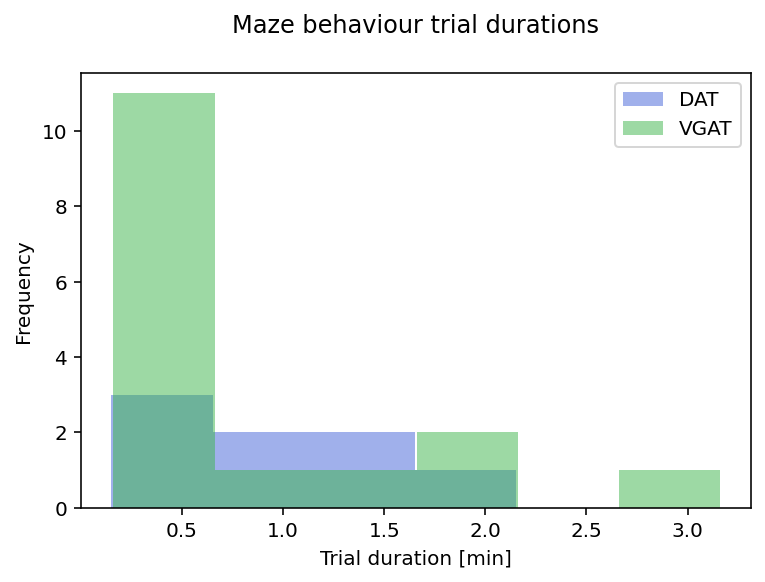

In [6]:
maze_trial_durations = (maze.groupby(['Genotype','Animal', 'Day']).size()/6000).reset_index(name='Trial duration [min]')
plots.g_hist(maze_trial_durations, 'Trial duration [min]', 'Genotype', 0.5, 'Maze behaviour trial durations', 'Trial duration [min]', 'Frequency')

0    0.0
1    0.0
Name: Exit_angle, dtype: float64
2    180.0
3    -45.0
4    135.0
5     45.0
Name: Exit_angle, dtype: float64


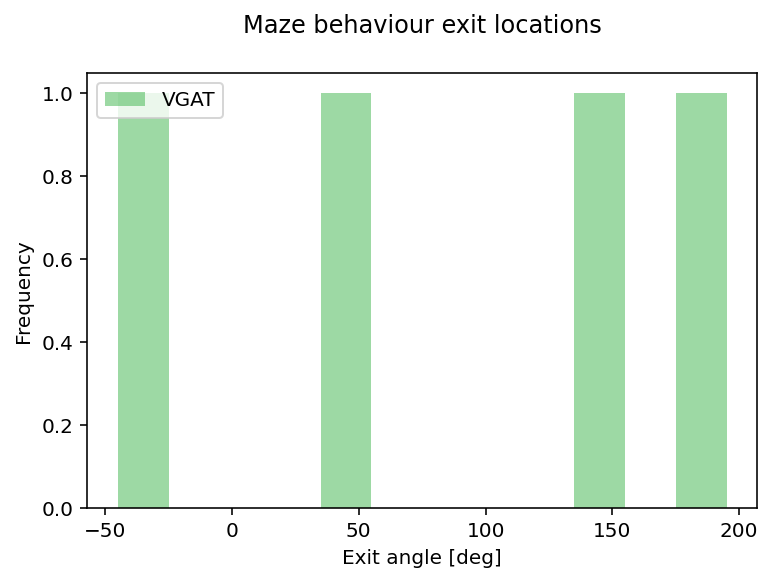

,Genotype,Animal,Day,Trial,X_centre,Y_centre,X_nose,Y_nose,X_tail,Y_tail,Area,Exit_angle
0,DAT,0,0.545525,0.995090,-0.002627,0.000256,0.001690,0.002496,-0.002368,-0.001524,3.016160,0.0
1,DAT,1,1.122343,2.185468,-0.040431,0.075548,-0.002033,0.001476,0.000537,-0.000703,3.018357,0.0
2,VGAT,2,0.555969,1.887237,0.002143,0.140607,0.001408,0.004721,-0.000170,-0.004228,3.016726,180.0
3,VGAT,3,1.389606,1.959578,-0.143135,-0.024260,-0.001577,0.002857,0.000415,-0.001293,3.017887,-45.0
4,VGAT,4,1.351158,2.070329,0.090342,0.161396,-0.001495,0.002996,0.002233,-0.003529,3.017388,135.0
5,VGAT,5,1.799751,1.725822,0.027445,-0.010357,-0.000455,-0.002154,-0.000082,0.001191,3.017187,45.0


In [5]:
maze_exit_angles= maze.groupby(['Genotype','Animal']).mean().reset_index()
plots.g_hist(maze_exit_angles, 'Exit_angle', 'Genotype', 20, 'Maze behaviour exit locations', 'Exit angle [deg]', 'Frequency')     
maze_exit_angles

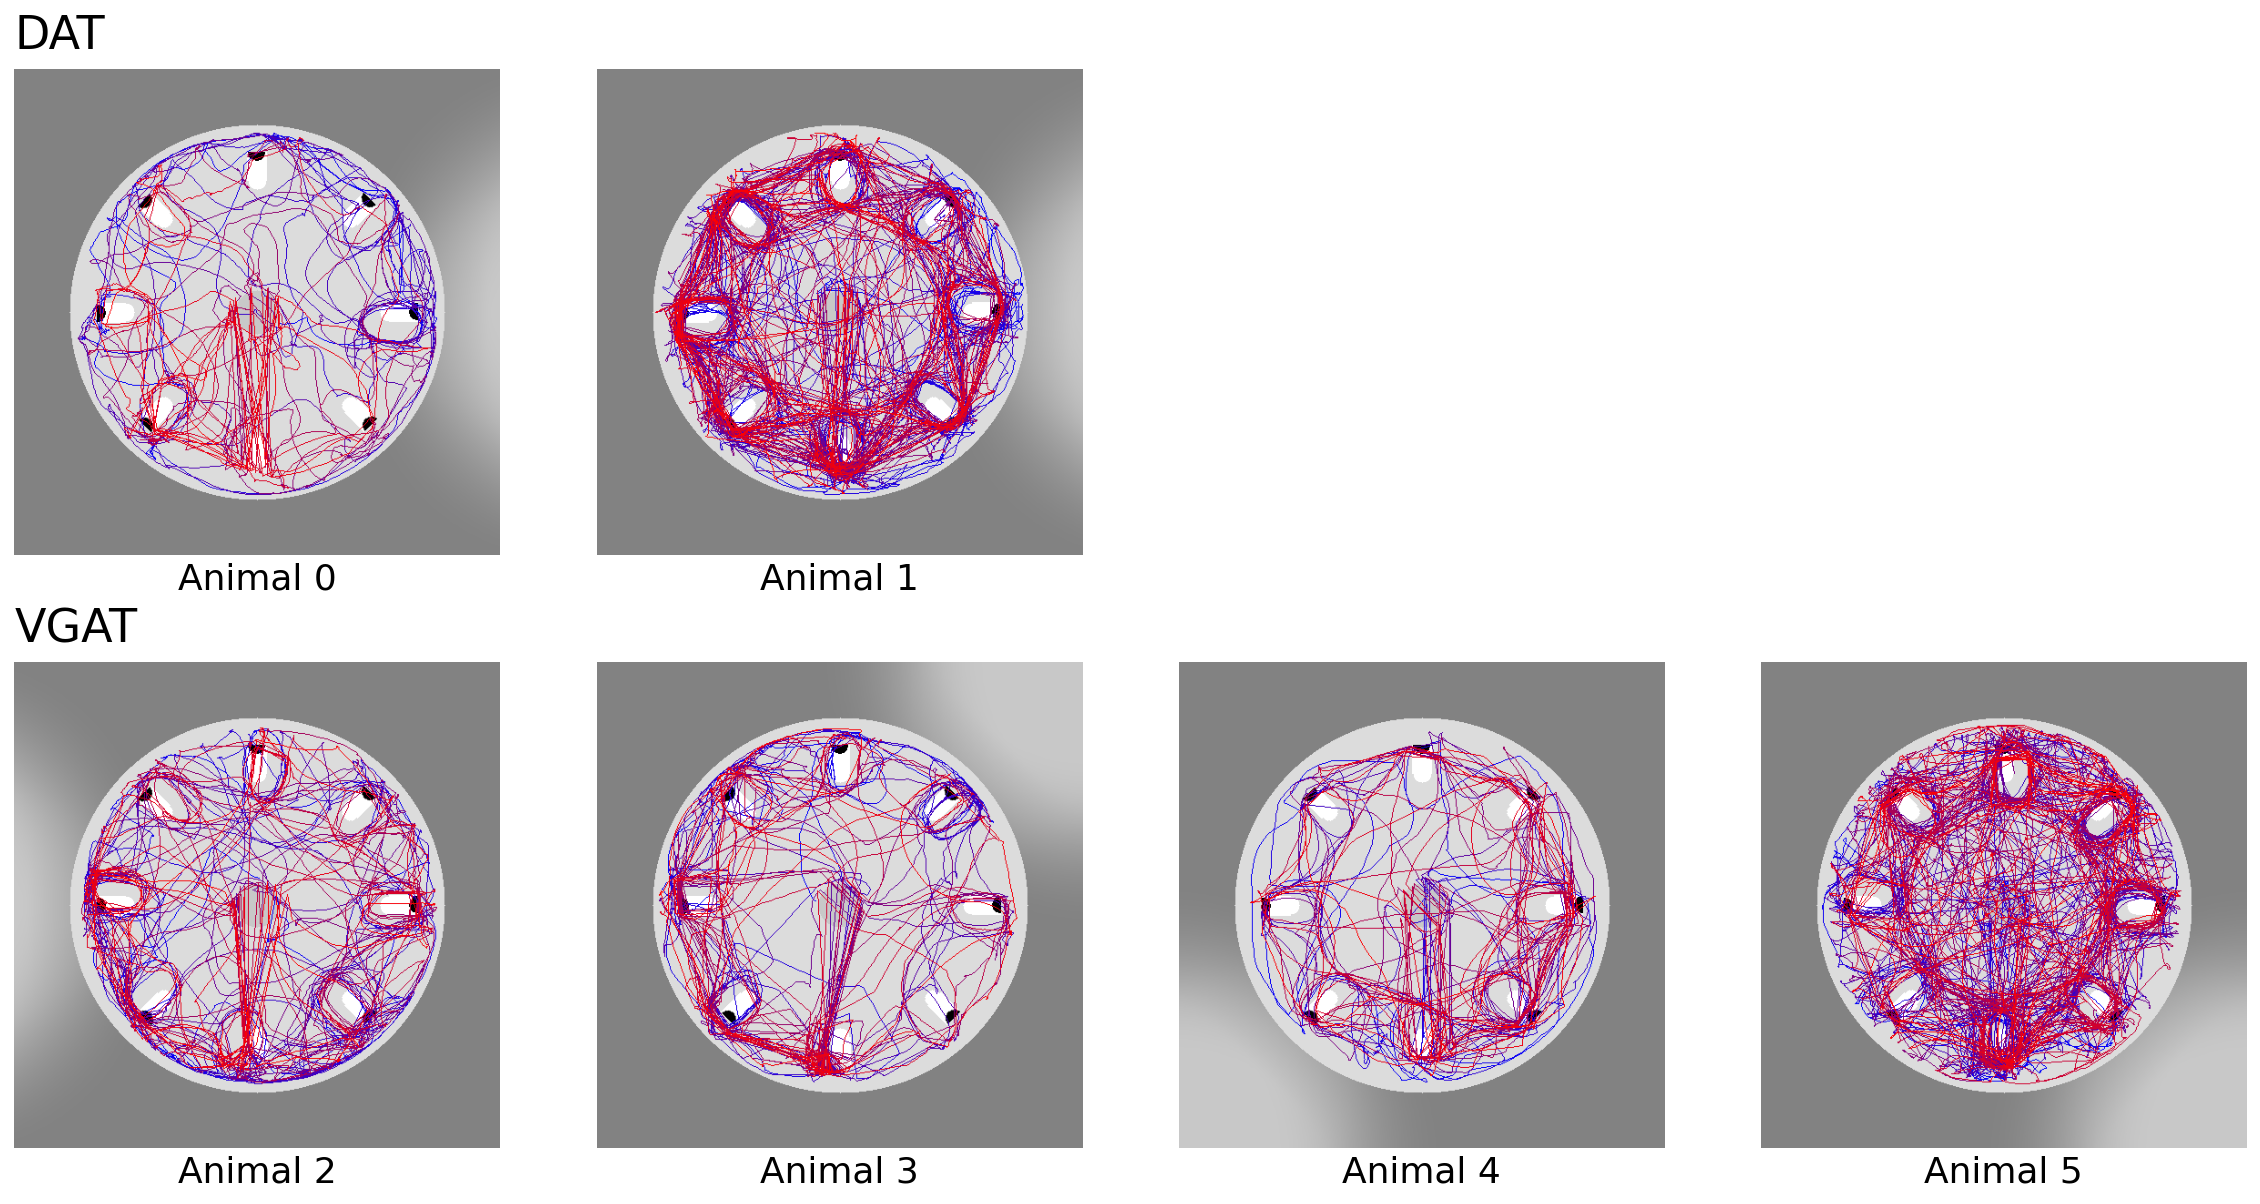

In [7]:
%autoreload 2
from plots import trajectory
trajectory(maze, color_by_time=True, group_by=['Genotype', 'Animal'])

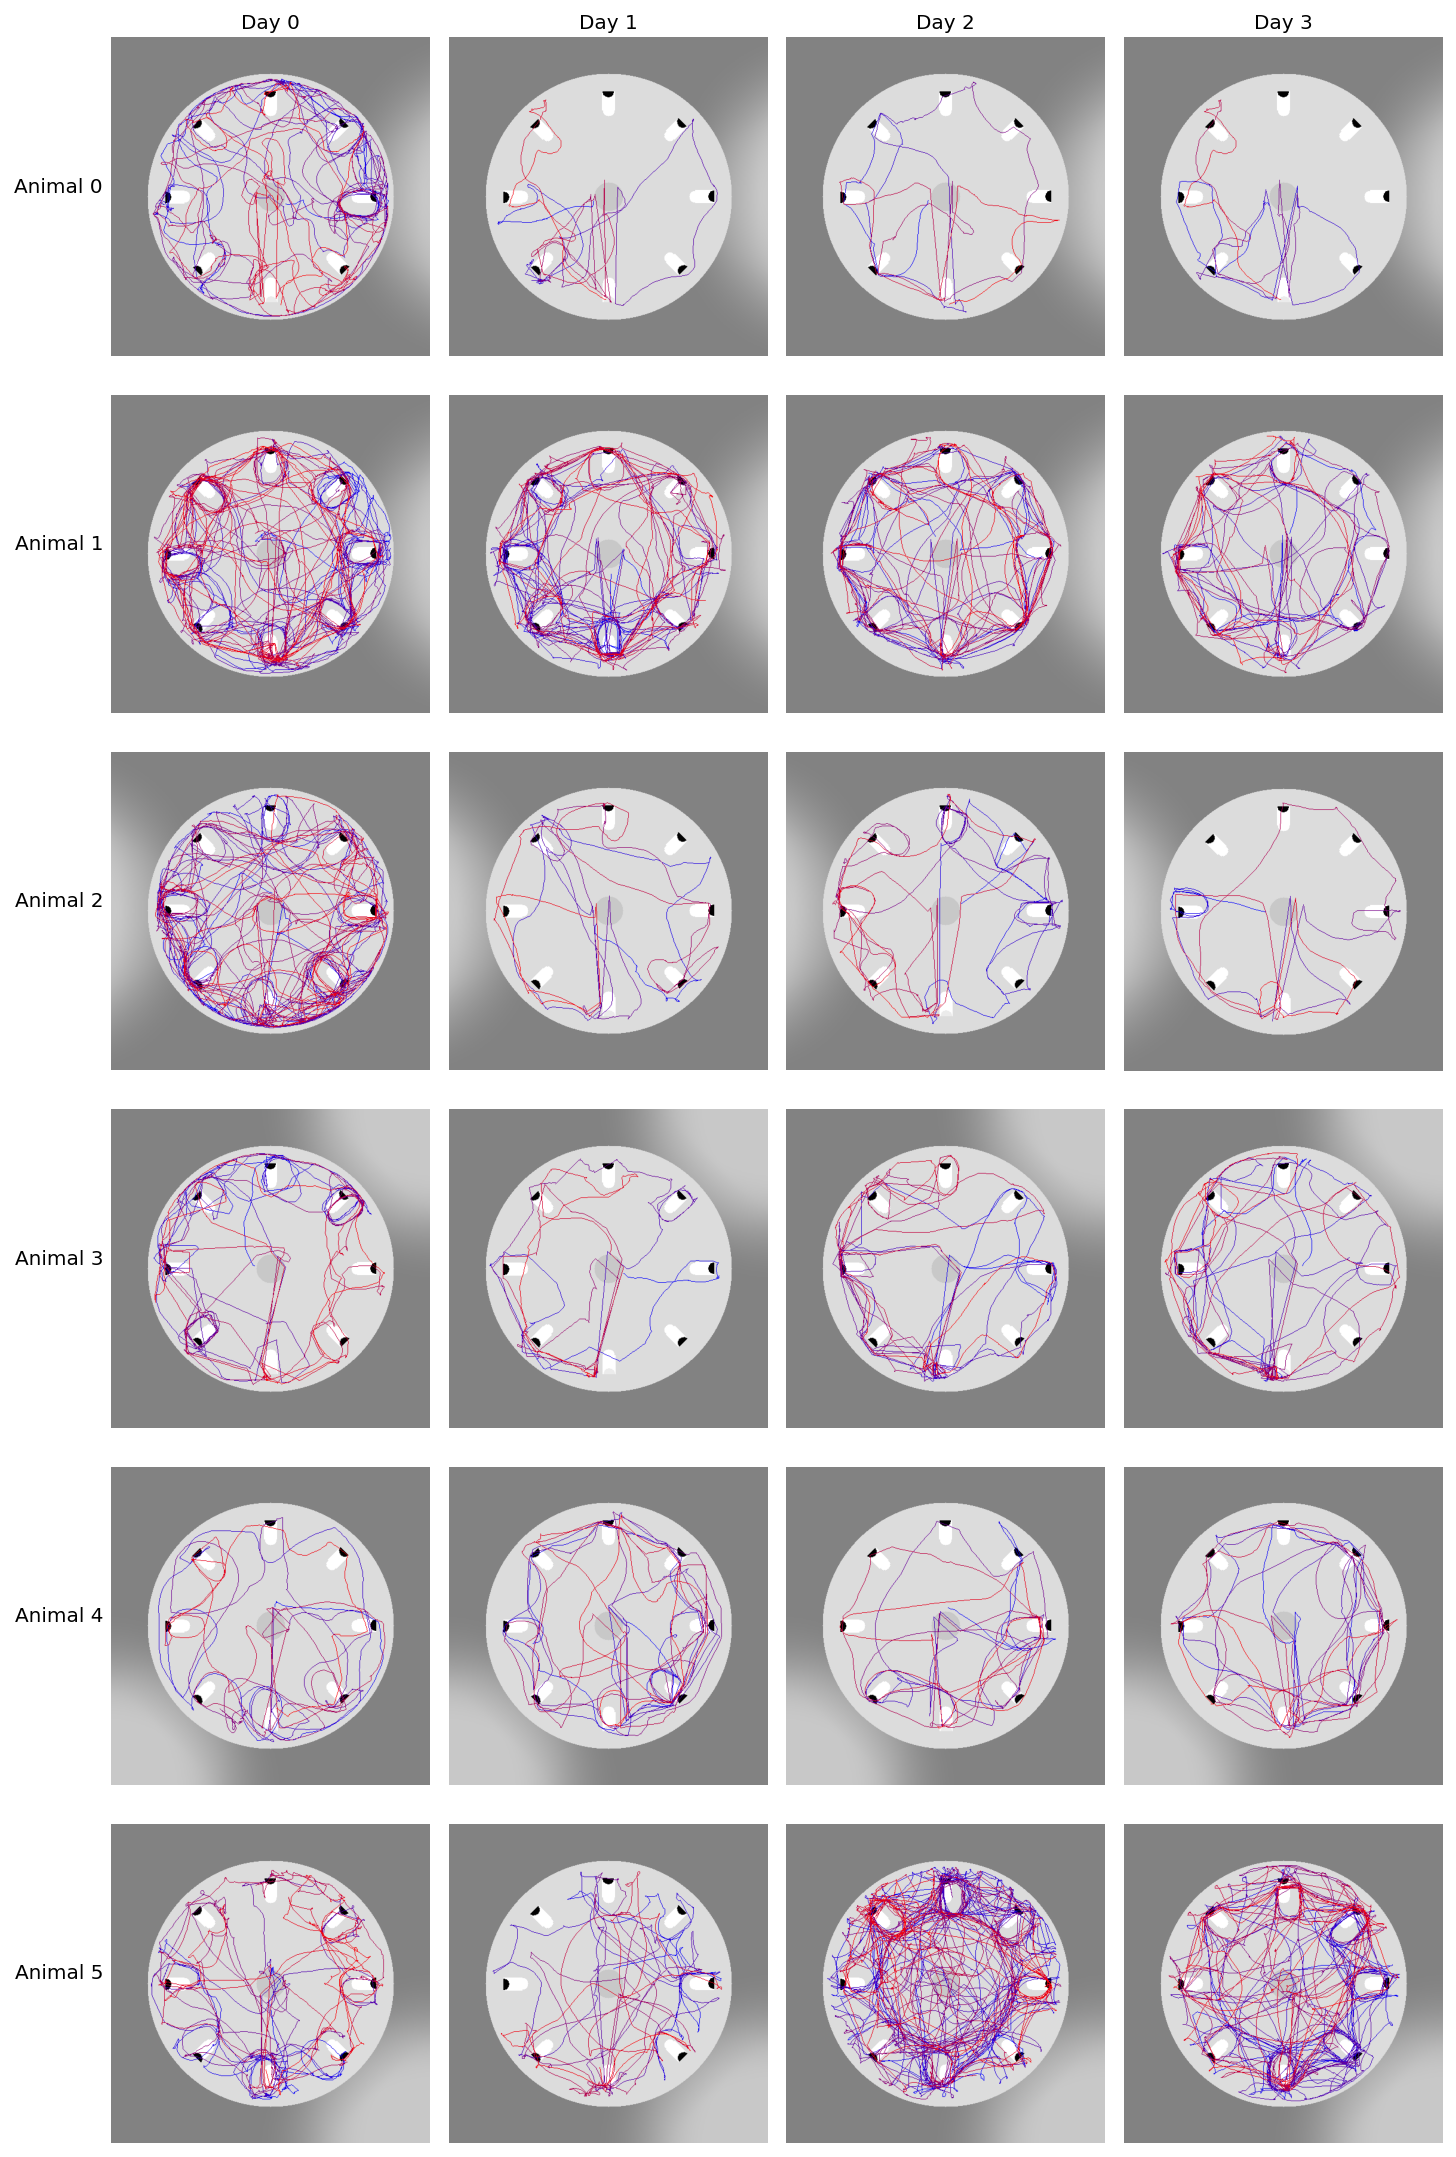

In [7]:
%autoreload 2
from plots import trajectory
trajectory(maze, color_by_time=True, group_by=['Animal', 'Day'])

In [ ]:
%autoreload 2
from plots import trajectory
trajectory(maze, color_by_time=True, heatmap=True)

In [ ]:
%autoreload 2
from plots import trajectory

trajectory(maze, color_by_time=True, heatmap=True)

# %autoreload 2
from plots import trajectory
print(maze[maze["Animal"]==3]["Exit_angle"].value_counts())

In [ ]:
import matplotlib.pyplot as plt
import cv2
from cv2 import FILLED
import numpy as np

exit_angle = 0
room_shading = True
room_centric = False
arena_d=466

if room_centric:
    room_rotation = 0
    port_rotation = exit_angle
else:
    room_rotation = -exit_angle
    port_rotation = 0
    
centre_d=int(arena_d*0.12)
border=int(arena_d/15.5)
light_d = arena_d//2
blur_d = arena_d//3

bg_shade = 130
arena_shade = 220
centre_shade = 200
light_shade = 200

image_s=arena_d+border*2
img = np.full((image_s*2,image_s*2,4),bg_shade, np.uint8)
img[:,:,-1]=255
if room_shading:
    cv2.circle(img, (image_s//2+image_s+border*2,image_s),light_d,(light_shade,light_shade,light_shade, 255), FILLED)
    img = cv2.blur(img, (blur_d, blur_d))
    rot_mat = cv2.getRotationMatrix2D((image_s,image_s), room_rotation, 1.0)
    img = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
img = img[image_s//2:image_s//2*3, image_s//2:image_s//2*3, :]
cv2.circle(img, (img.shape[0]//2,img.shape[0]//2),arena_d//2,(arena_shade,arena_shade,arena_shade, 255), FILLED)
cv2.circle(img, (img.shape[0]//2,img.shape[0]//2),centre_d//2,(centre_shade,centre_shade,centre_shade, 255), FILLED)


for alpha in range(0,360,45):    
    img_port = np.full((image_s,image_s,4), 0, np.uint8)
    port_coords = (np.array([0.475, 0.075, 0.525, 0.15, 0.5, 0.025]) * arena_d).astype(int)
    port_coords[0:5] += border
    cv2.rectangle(img_port,(port_coords[0], port_coords[1]),(port_coords[2], port_coords[3]),(255,255,255,255),FILLED)
    cv2.circle(img_port,(port_coords[4], port_coords[3]),port_coords[5],(255,255,255,255),FILLED)    
    if (alpha != port_rotation+180) & (alpha != port_rotation-180):
        cv2.ellipse(img_port,(port_coords[4]-1, port_coords[1]),(port_coords[5]-1,port_coords[5]-1),0,0,180,(0,0,0,255),FILLED)
    else:
        cv2.ellipse(img_port,(port_coords[4]-1, port_coords[1]),(port_coords[5]-1,port_coords[5]-1),0,0,180,(235,235,235,255),FILLED)
    rot_mat = cv2.getRotationMatrix2D((image_s//2,image_s//2), alpha, 1.0)
    img_port = cv2.warpAffine(img_port, rot_mat, img_port.shape[1::-1], flags=cv2.INTER_LINEAR)
    img[img_port[...,3] == 255] = img_port[img_port[...,3] == 255]

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img[:,:,:3])
ax.axis('off')
plt.show()

### import numpy as np
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(np.random.normal(0, 20, (10,2)))

In [ ]:
maze["Exit_angle"][0]